## Diabetes Data Analysis and Modelling

#### Problem statement:

What are the indicators of type 2 diabetes?  What are the warning signs?  Are these relationships proof of causation or association?  What health goals should we pursue to protect ourselves from type 2 diabetes?  Will it help?  These questions among others we will try to answer in this analysis.  

Type 2 diabetes accounts for 90% of diabetes cases in Canada.  Data Science techniques can more precisely calculate the relationship between the predictive variables and the outcome.  We can use tools such as sci-kit learn to build models on the data.  These models can help to predict whether a person is likely to have diabetes based on a set of measured variables.

In our analysis, we will be adjusting the probability score threshold to adjust recall and precision.  The objective would be to increase recall as much as possible, at the expense of reducing precision.  Correctly identifying when a person has type 2 diabetes is crucial.  We would want to get as many true positives correct at the expense of making some false positive predictions.

#### Background on Type II Diabetes:

According to canada.ca, about 3.0 million Canadians were living with diagnosed diabetes in 2014.  This number equates to about 8.1% of all Canadians.  Of these people, 90% are diagnosed with Type 2 diabetes.  Type 2 diabetes is a metabolic disorder where the pancreas does not sufficiently produce insulin or the body is not capable of utilizing the produced insulin.  Without enough working insulin, the body's blood glucose level can increase to unhealthy and even dangerous levels.  This imbalance can lead to damage to organs, blood vessels, and nerves.

While there is no known cure for Type 2 diabetes, it can be managed with healthy eating, regular exercise or medication to substitute the body's insulin levels.

For more information, visit canada.ca (https://www.canada.ca/en/public-health/services/publications/diseases-conditions/diabetes-canada-highlights-chronic-disease-surveillance-system.html) or diabetes.ca (https://www.diabetes.ca/about-diabetes/type-2).

In [159]:
# Import core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_diabetes
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

#### About the dataset

This dataset was obtained from Kaggle at this link (https://www.kaggle.com/uciml/pima-indians-diabetes-database).  It was originally compiled by the National Institute of Diabetes and Digestive and Kidney Diseases in 1988.  All of the patients are females over the age of 21.  It consists of 768 observations in total.  It contains eight medical predictor variables and one target variable, either 1 for positive diabetes diagnoses or 0 for a negative diabetes diagnosis.

The columns of the dataset are:
<ul>
    <li>Pregnancies: Number of pregnancies the patient has had in their life</li>
    <li>Glucose: The patient's blood glucose levels (mg/dl)</li>
    <li>BloodPressure: The patient's diastolic blood pressure (mm/Hg)</li>
    <li>SkinThickness: The patient's anterior abdomen's subcutaneous adipose tissue thickness (mm)</li>
    <li>Insulin: The patient's insulin level measured in milli-international units per litre (mIU/L)</li>
    <li>BMI: Body Mass Index measured in (kg/m^2)</li>
    <li>DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history</li>
    <li>Age: Age of the patient (years)</li>
    <li>Outcome: Diabetes (1), Non-Diabetes(0)</li>
</ul>

In [160]:
# Read in the csv file
diabetes2_df = pd.read_csv("data\diabetes2.csv")

#### Exploratory Data Analysis

The exploratory data analysis will provide an overview of the chosen dataset.  In this section I will cover the following:
<ul>
    <li>Check the data types of the variables</li>
    <li>View the key statistics of each variable</li>
    <li>Remove the non-existant values</li>
    <li>Remove duplicated entries</li>
    <li>Plot a heat map of the correlations between predictor variables</li>
    <li>Histograms to view the distribution of each variable</li>
    <li>Box plots and violin plots to view the distribution of each variable for positive and negative outcomes</li>
</ul>

In [161]:
# Use .head() method to view the contents of the first 5 rows
diabetes2_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [162]:
print("Shape: ", diabetes2_df.shape)

Shape:  (768, 9)


In [163]:
# use .info() to check the data types
diabetes2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [164]:
# View key statistics
diabetes2_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [165]:
# See how many 0 (missing) values each variable has
for column in diabetes2_df.columns:
    print(f"Rows with 0 for {column}: ", diabetes2_df[diabetes2_df[column] == 0].shape[0])

Rows with 0 for Pregnancies:  111
Rows with 0 for Glucose:  5
Rows with 0 for BloodPressure:  35
Rows with 0 for SkinThickness:  227
Rows with 0 for Insulin:  374
Rows with 0 for BMI:  11
Rows with 0 for DiabetesPedigreeFunction:  0
Rows with 0 for Age:  0
Rows with 0 for Outcome:  500


The zero values in this dataset for all the predictive variables other than Pregnancies are missing values.  It does not make any sense for glucose, blood pressure, skin thickness, insulin, or BMI to be zero.  This means that they are missing values.  To deal with these null values, we can remove the rows with null values.  The other alternative would be to use the median of each variable to fill the missing values.  However, this will somewhat skew the data, so it would be better to just remove the rows entirely if possible.  

In [166]:
diabetes2_df = diabetes2_df[diabetes2_df['Insulin'] != 0]
diabetes2_df = diabetes2_df[diabetes2_df['BMI'] != 0]
diabetes2_df = diabetes2_df[diabetes2_df['Glucose'] != 0]
diabetes2_df = diabetes2_df[diabetes2_df['BloodPressure'] != 0]
diabetes2_df = diabetes2_df[diabetes2_df['SkinThickness'] != 0]

In [167]:
for column in diabetes2_df.columns:
    print(f"Rows with 0 for {column}: ", diabetes2_df[diabetes2_df[column] == 0].shape[0])

Rows with 0 for Pregnancies:  56
Rows with 0 for Glucose:  0
Rows with 0 for BloodPressure:  0
Rows with 0 for SkinThickness:  0
Rows with 0 for Insulin:  0
Rows with 0 for BMI:  0
Rows with 0 for DiabetesPedigreeFunction:  0
Rows with 0 for Age:  0
Rows with 0 for Outcome:  262


In [168]:
diabetes2_df.drop_duplicates().shape

(392, 9)

In [169]:
diabetes_df = diabetes2_df.drop_duplicates().reset_index(drop=True)

Above I dropped the duplicates which reduced the count to n=392.  While this gives us a smaller sample size, it is the right thing to do.  For duplicates to exist should not be accidental, since there are nine variables, including DiabetesPedigreeFunction, which has three decimal places.  With limited information about the dataset, this is the best course of action.

In [170]:
diabetes_df.shape

(392, 9)

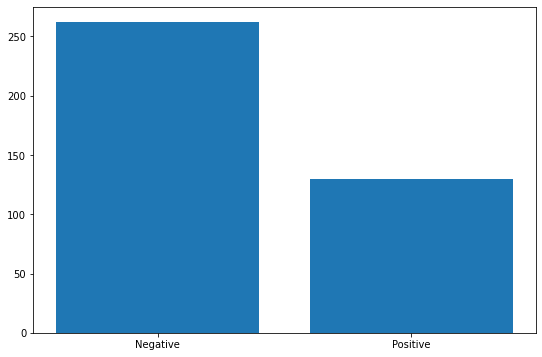

In [171]:
plt.figure(figsize=(9,6))
plt.bar(['Negative','Positive'],diabetes_df['Outcome'].value_counts().values)
plt.show()

We can see that the negative class is much larger than the positive class.  Later, we will use upsampling to improve the model's ability to predict positive outcomes.

In [172]:
# Check the key statistics again after removing the missing values
diabetes_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


In [173]:
# Check for correlation between the variables
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


Text(0.5, 1.0, 'Diabetes Variable Correlations\n(Lighter means more correlation)')

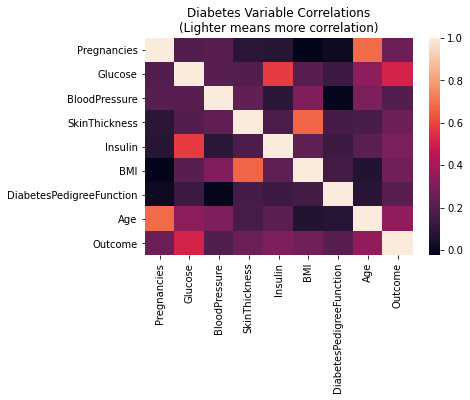

In [174]:
sns.heatmap(diabetes_df.corr()).set_title("Diabetes Variable Correlations\n(Lighter means more correlation)")

Some collinearity exists within these variables.  Number of pregnancies and age has a positive correlation (0.680).  This is understandable as an increase in age will relate to a higher average number of pregnancies.  However, since pregnancies and age are measuring different things, it would be acceptable to keep both variables.  Collinearity also exists between BMI and SkinThickness (correlation of 0.664).  The multiple regression should reduce or eliminate the bias in this collinearity.  BMI and SkinThickness represent different measurements and can each offer meaning, so I would like to keep them both.  There is also a correlation between insulin and glucose (0.581), which makes sense since insulin controls the body's glucose levels.

Next, we will examine the variable data using histograms, box charts, and violin plots.

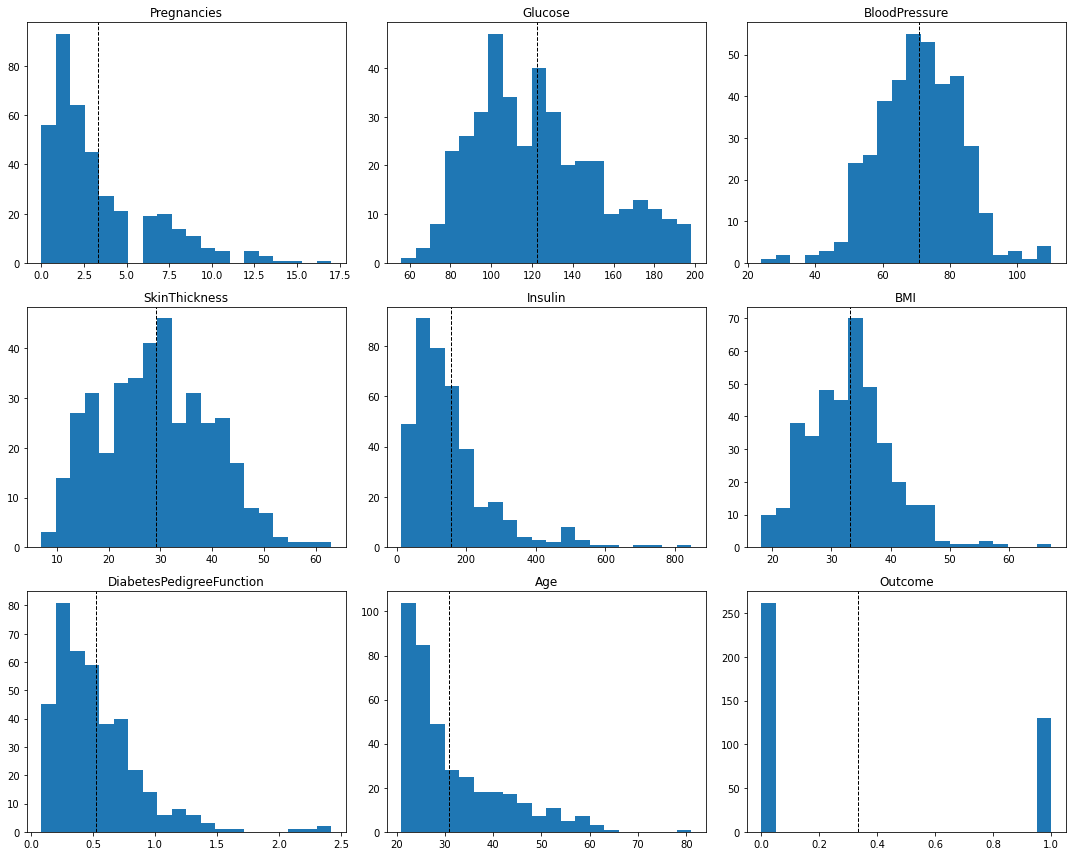

In [175]:
# make histograms to view the distributions
plt.subplots(3,3, figsize=(15,12))

for column in diabetes_df.columns:
    plt.subplot(3, 3, diabetes_df.columns.get_loc(column)+1)
    plt.hist(diabetes_df[column], bins=20)
    plt.axvline(diabetes_df[column].mean(), linestyle='dashed', linewidth=1, color='k')
    plt.title(column)
    
plt.tight_layout()
plt.show()

Looking at the histograms of the variables, it appears that pregnancies, insulin, diabetes pedegree function, and age are right skewed.  They have many values close to zero, and the variance increases with the larger values.  Glucose, blood pressure, skin thickness, and BMI are close to symmetrical.  These symmetrical distributions can be attributed to a mean with distributions evenly around it.  These variables do not have realistic zero values.

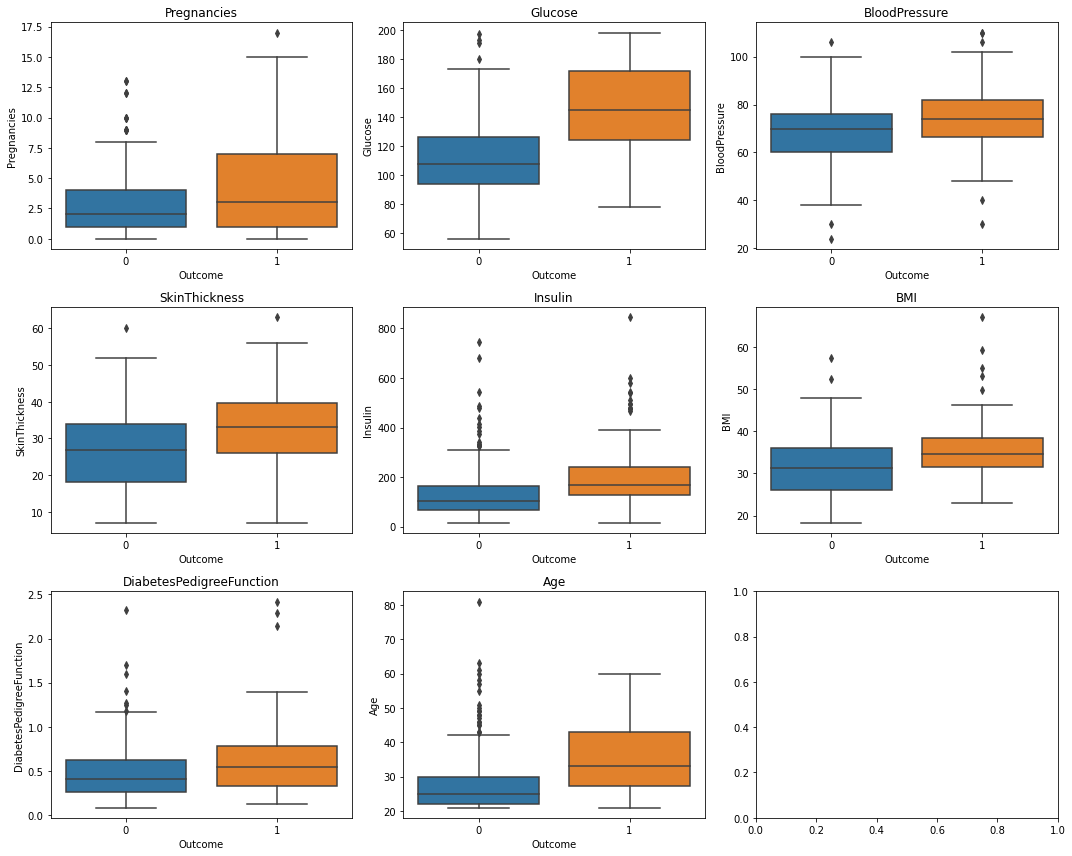

In [176]:
# Make box plots to view the distributions in relation to the outcome
plt.subplots(3,3, figsize=(15,12))

for column in diabetes_df.columns[:8]:
    plt.subplot(3,3, diabetes_df.columns.get_loc(column)+1)
    sns.boxplot(x='Outcome', y=column, data=diabetes_df)
    plt.title(column)

plt.tight_layout()
plt.show()

The boxplots provide an illustration of how the variables differ for the two outcomes (0 means negative, 1 means positive).  We can see that glucose has the largest increase for the positive class.  The remaining variables all have higher means, Q1, and Q3, for the positive class.

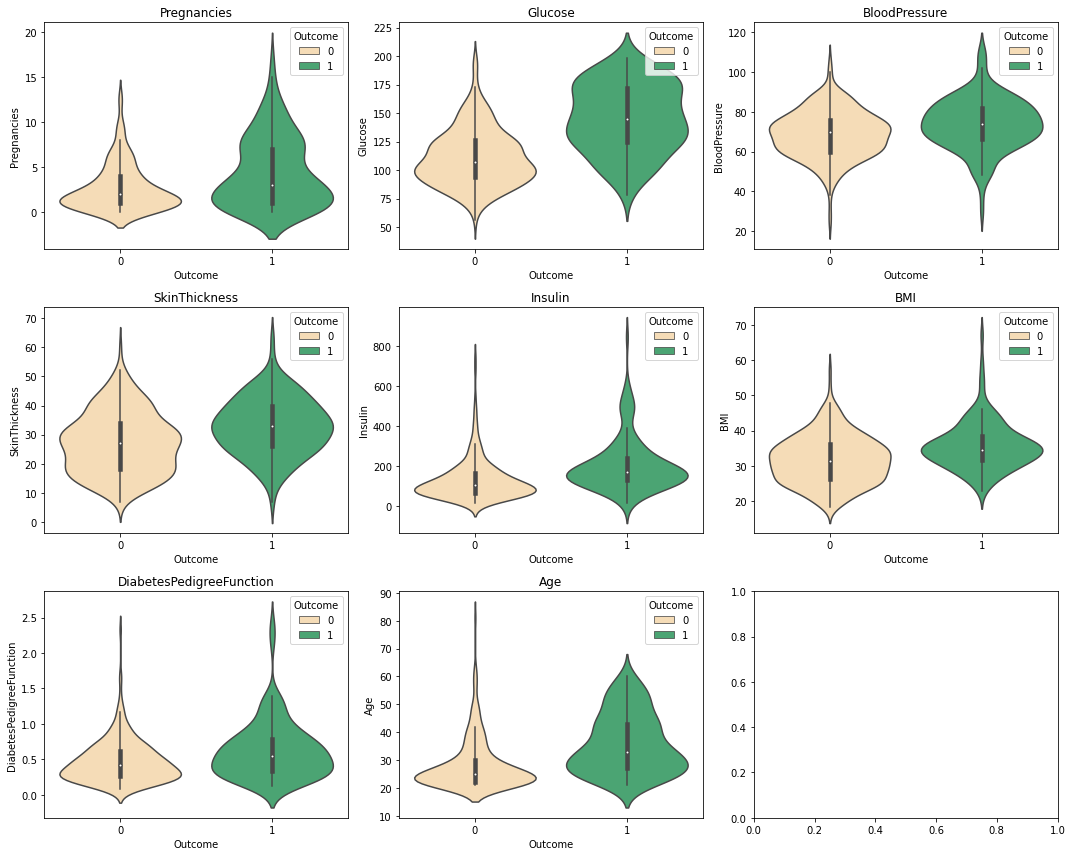

In [177]:
# Make violin plots to view the distributions in relation to the outcomes
plt.subplots(3,3, figsize=(15,12))

for column in diabetes_df.columns[:8]:
    plt.subplot(3, 3, diabetes_df.columns.get_loc(column)+1)
    sns.violinplot(x='Outcome', y=column, data=diabetes_df, hue='Outcome', dodge=False, palette=['navajowhite','mediumseagreen'])
    plt.title(column)

plt.tight_layout()
plt.show()

Similar to the boxplots, the violin plots illustrate the difference in distribution for the negative and positive class.  This type of plot also helps to visualize the variability in the distributions.  The glucose and age violin plots show the biggest observable differences between the negative and positive classes.  The other plots show close distributions.

#### Data Inference using the Logistic Regression model

In [178]:
# Use stats models to build a logistic regression model
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_withconstant = sm.add_constant(X)

logit_results = sm.Logit(y, X_withconstant).fit()
logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.438803
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                            8
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.3093
Time:                        15:50:16   Log-Likelihood:                -172.01
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 2.765e-29
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -10.0407      1.218     -8.246      0.000     -12.427      -7.654
Pregnancies                  0.0822      0.055      1.482      0.138      -0.026       0.191
Glucose                      0.0383      0.006      6.635      0.000       0.027       0.050
BloodPressure               -0.0014      0.012     -0.120      0.904      -0.025       0.022
SkinThickness                0.0112      0.017      0.657      0.511      -0.022       0.045
Insulin                     -0.0008      0.001     -0.632      0.528      -0.003       0.002
BMI                          0.0705      0.027      2.580      0.010       0.017       0.124
DiabetesPedigreeFunction     1.1409      0.427      2.669      0.008       0.303       1.979
Age                          0.0340      0.018      1.847      0.065      -0.002       0.070
============================================================================================
"""

In [179]:
logit_results.prsquared

0.30932995857726187

In [180]:
# Calculate the r-squared after dropping each predictor variable
for column in X:
    X_drop_one = X.drop(column, axis=1)
    X_drop_one_withconstant = sm.add_constant(X_drop_one)
    logit_drop_one = sm.Logit(y, X_drop_one_withconstant).fit(disp=0)
    print(f"Dropped {column}, R-Squared: ",logit_drop_one.prsquared)

Dropped Pregnancies, R-Squared:  0.3048845268693702
Dropped Glucose, R-Squared:  0.20306711524447074
Dropped BloodPressure, R-Squared:  0.3093010699022366
Dropped SkinThickness, R-Squared:  0.30846504305535616
Dropped Insulin, R-Squared:  0.3085327910072253
Dropped BMI, R-Squared:  0.29553490313509767
Dropped DiabetesPedigreeFunction, R-Squared:  0.29415376988837516
Dropped Age, R-Squared:  0.30224597432179134


Using the R-squared approach for backward elimination, we can see that dropping any of the variables does not increase the R-Squared value.  Since our objective is to maximize the prediction accuracy, we will not be dropping any of the predictor variables.

Next, we will be calculating the odds change for each predictor variable

In [181]:
# Obtain the coefficients
coefficients = logit_results.params
p_values = logit_results.pvalues
coefficient_df = pd.DataFrame({"coefficient": coefficients,
                               "p-value": p_values})
coefficient_df.drop('const', axis=0, inplace=True)
# keep only the significant coefficients (below 0.05)
statistically_significant_condition = coefficient_df['p-value'] < 0.5
significant_coefficient_df = coefficient_df.loc[statistically_significant_condition].copy()

significant_coefficient_df['abs_coef'] = np.abs(significant_coefficient_df['coefficient'])
significant_coefficient_df = significant_coefficient_df.sort_values(by='abs_coef')
# set colors for positive and negative
significant_coefficient_df['color'] = np.where(significant_coefficient_df['coefficient'] >= 0.0, 'blue', 'red')
# set the odds increase based on the logit equation
significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                                       np.exp(significant_coefficient_df['coefficient']),
                                                       np.exp(-significant_coefficient_df['coefficient']))

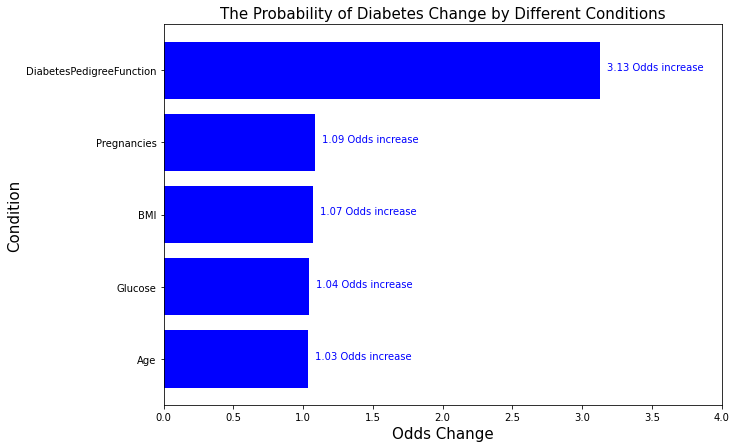

In [182]:
# plot the odds change 
fig, ax = plt.subplots(figsize=(10,7))

ax.barh(significant_coefficient_df.index,
        significant_coefficient_df['odds_increase'],
        color=significant_coefficient_df['color'])
# For each variable we find the right x and y positions
for variable_name in significant_coefficient_df.index:
    X_position = significant_coefficient_df.loc[variable_name, 'odds_increase']
    Y_position = variable_name
    
    # Let's round the text value to two decimals
    text_value = round(significant_coefficient_df.loc[variable_name, 'odds_increase'], 2)
    
    # The offset will have to be different for positive and negative bars
    # since the text is always written left to right
    if (X_position > 0):
        text_value = str(text_value) + " Odds increase"
        ax.text(X_position+0.05, Y_position, s=text_value, c="blue")
    else:
        text_value = str(-text_value) + " Odds increase"
        ax.text(X_position-2.6, Y_position, s=text_value, c="red")
        
plt.xlim(0.0, 4.0)
plt.title("The Probability of Diabetes Change by Different Conditions", size=15)
plt.xlabel("Odds Change", size=15)
plt.ylabel("Condition", size=15)
plt.show()

The graph above includes only the variables with a statistically significant coefficient that is not zero.  Insulin, skin thickness, and blood pressure have p-values greater than 0.05, therefore, they are removed from this graph.  We calculate the odds change which can be obtained with $e^{\beta_i}$.  For one increase in the unit, the odds (calculated as the $Prob_{success}$ divided by $Prob_{failure}$) increases by a factor of $e^{\beta_i}$.  For example, this can be interpreted by saying one $Kg/m^2$ of BMI increase for an observation increases the odds of a positive diabetes outcome by a factor of 1.07.

However, since the units for each of these variables are different, It is difficult to compare the relative impacts of these predictor variables.  Specifically, the Diabetes Pedigree Function uses a zero to one scale, which makes the odds increase for one unit appear much greater.  To get a better understanding of the odds change, we will re-do this graph after scaling the data on normal distributions.

In [183]:
# make a scaler
std_scaler = StandardScaler()
# fit the scaler
std_scaler.fit(X)
# transform the data
X_scaled = std_scaler.transform(X)
X_scaled_df = pd.DataFrame(columns=X.columns, data=X_scaled)
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668


In [184]:
# Run the logit model again
X_scaled_withconstant = sm.add_constant(X_scaled_df)

logit_results_2 = sm.Logit(y, X_scaled_withconstant).fit()
logit_results_2.summary()

Optimization terminated successfully.
         Current function value: 0.438803
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                            8
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.3093
Time:                        15:50:17   Log-Likelihood:                -172.01
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 2.765e-29
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0003      0.143     -6.981      0.000      -1.281      -0.719
Pregnancies                  0.2635      0.178      1.482      0.138      -0.085       0.612
Glucose                      1.1795      0.178      6.635      0.000       0.831       1.528
BloodPressure               -0.0177      0.148     -0.120      0.904      -0.307       0.272
SkinThickness                0.1179      0.179      0.657      0.511      -0.234       0.470
Insulin                     -0.0980      0.155     -0.632      0.528      -0.402       0.206
BMI                          0.4951      0.192      2.580      0.010       0.119       0.871
DiabetesPedigreeFunction     0.3937      0.147      2.669      0.008       0.105       0.683
Age                          0.3459      0.187      1.847      0.065      -0.021       0.713
============================================================================================
"""

In [185]:
# Obtain the coefficients
coefficients = logit_results_2.params
p_values = logit_results_2.pvalues
coefficient_df = pd.DataFrame({"coefficient": coefficients,
                               "p-value": p_values})
coefficient_df.drop('const', axis=0, inplace=True)
# keep only the significant coefficients (below 0.05)
statistically_significant_condition = coefficient_df['p-value'] < 0.5

significant_coefficient_df = coefficient_df.loc[statistically_significant_condition].copy()

significant_coefficient_df['abs_coef'] = np.abs(significant_coefficient_df['coefficient'])
significant_coefficient_df = significant_coefficient_df.sort_values(by='abs_coef')
# set colors for positive and negative
significant_coefficient_df['color'] = np.where(significant_coefficient_df['coefficient'] >= 0.0, 'blue', 'red')
# set the odds increase based on the logit equation
significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                                       np.exp(significant_coefficient_df['coefficient']),
                                                       np.exp(-significant_coefficient_df['coefficient']))

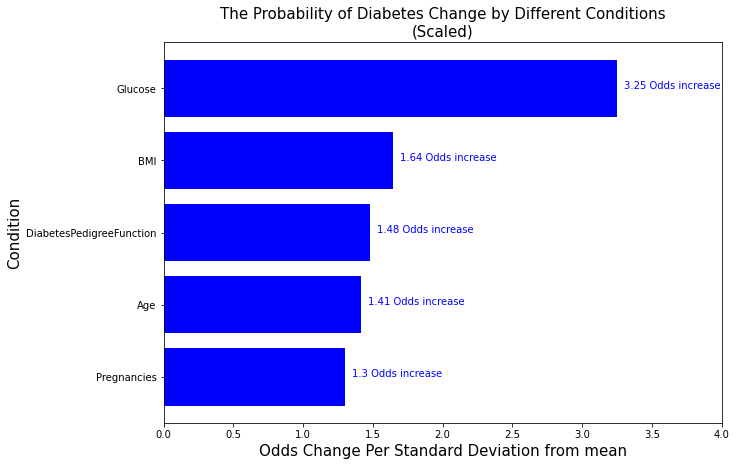

In [186]:
# plot the odds change 
fig, ax = plt.subplots(figsize=(10,7))

ax.barh(significant_coefficient_df.index,
        significant_coefficient_df['odds_increase'],
        color=significant_coefficient_df['color'])
# For each variable we find the right x and y positions
for variable_name in significant_coefficient_df.index:
    X_position = significant_coefficient_df.loc[variable_name, 'odds_increase']
    Y_position = variable_name
    
    # Let's round the text value to two decimals
    text_value = round(significant_coefficient_df.loc[variable_name, 'odds_increase'], 2)
    
    # The offset will have to be different for positive and negative bars
    # since the text is always written left to right
    if (X_position > 0):
        text_value = str(text_value) + " Odds increase"
        ax.text(X_position+0.05, Y_position, s=text_value, c="blue")
    else:
        text_value = str(-text_value) + " Odds increase"
        ax.text(X_position-2.6, Y_position, s=text_value, c="red")
        
plt.xlim(0.0, 4.0)
plt.title("The Probability of Diabetes Change by Different Conditions\n(Scaled)", size=15)
plt.xlabel("Odds Change Per Standard Deviation from mean", size=15)
plt.ylabel("Condition", size=15)
plt.show()

After scaling the data, we can graph the odds change per 1 standard deviation increase from the mean.  This makes it easier to compare the relative impact of the predictor variables.  This illustrates the odds change based on the relative change according to the rest of the distribution of that variable.  For example, the mean of BMI is $\bar{X} = 31.99 kg/m^2$ and standard deviation is $\bar{\sigma} = 7.88$.  If we had an observation with BMI $31.99 kg/m^2$, and increased it by one standard deviation to $39.87 kg/m^2$, the odds of a positive diabetes outcome would increase by a factor of 1.64.

On the other hand, if an observation has a BMI that is one standard deviation below the mean, that would make an odds change by a factor of $e^{-0.4951} \approx 0.61$ when compared to the same observation with a BMI at the mean.  In other words, the odds change would **decrease** by a factor of $e^{0.4951} \approx 1.64$.

We can see that glucose impacts the odds increase the most per increase in standard deviation.  This means that increasing the glucose from its mean value will affect the odds of having a positive diabetes classification than the other variables.  BMI is next most impactful, followed by diabetes pedigree function, age, and pregnancies.

#### Building predictive models using Logit, Decision Trees, and Support Vector Machines

Here, we will build models using Logit, decisions trees, and SVMs.  We will optimize hyperparameters for each of them to find the best configuration.  Then, we will evaluate each model on several metrics.

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [188]:
# re-assign the predictor and target variables
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [189]:
# split the observations into remainder and test
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size=0.2)

In [190]:
# split the remainder into validation and train
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3, random_state=1)

In [191]:
# use standard scaler to scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [192]:
# for logit, we test a range of C-values
validation_scores = []
train_scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    logreg = LogisticRegression(C = c, random_state = 1, max_iter=1000)
    logreg.fit(X_train, y_train)
    
    train_scores.append(logreg.score(X_train, y_train))
    validation_scores.append(logreg.score(X_validation, y_validation))

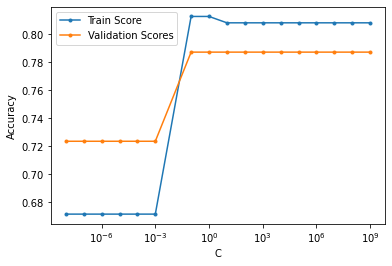

In [193]:
# plot the validation and train scores for the range of C-values
plt.figure()
plt.plot(C_range, train_scores, label='Train Score', marker='.')
plt.plot(C_range, validation_scores, label='Validation Scores', marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It looks like the highest validation score is between 0.001 and 0.1.  We will use 0.1 for our model.  For the decision tree classifier and the SVM, we will use GridSearchCV to find the best combination of hyperparameters.

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [195]:
# Define hyperparameters to search over
dt_params = {'max_depth' : list(range(1,11)), 'min_samples_leaf': [1,5,10,50,100,500,1000,5000,10000]}

In [196]:
# Initiate the DT grid search
gs_dtmodel = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=dt_params, cv=5)
# Fit the DT grid search
gs_dtmodel_fitted = gs_dtmodel.fit(X_train, y_train)

In [197]:
# Show the best estimators
gs_dtmodel_fitted.best_params_

{'max_depth': 8, 'min_samples_leaf': 1}

In [198]:
# Let's see if our accuracy improved
print(gs_dtmodel_fitted.score(X_train, y_train))
print(gs_dtmodel_fitted.score(X_test, y_test))

0.9908675799086758
0.759493670886076


In [199]:
# SVM - Define hyperparameters to search over
svm_params = {'kernel' : ['linear','poly','rbf','sigmoid'], 
              'C' : [.000001,.00001,.0001,.001,.1,1,10,100,1000,10000,100000,1000000]}

In [200]:
# Initiate the SVM grid search
gs_svm_model = GridSearchCV(estimator = SVC(), param_grid=svm_params, cv=5)
# Fit the SVM grid search
gs_svm_model_fitted = gs_svm_model.fit(X_train, y_train)

In [201]:
# Show the best estimators
gs_svm_model_fitted.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [202]:
# Let's see if our accuracy improved
print("SVM train score: ", gs_svm_model_fitted.score(X_train, y_train))
print("SVM test score: ", gs_svm_model_fitted.score(X_test, y_test))

SVM train score:  0.8082191780821918
SVM test score:  0.7468354430379747


In [203]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [205]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [206]:
final_logit = LogisticRegression(C=1, random_state=1, max_iter=1000)
final_logit.fit(X_train, y_train)
final_logit.score(X_test, y_test)

0.7848101265822784

In [207]:
y_train_pred =  final_logit.predict(X_train)
y_test_pred = final_logit.predict(X_test)

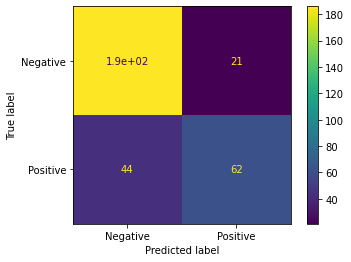

In [208]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_matrix, ['Negative','Positive']).plot()

Before continuing, we should build a confusion matrix to see where the model is making errors.  Since the negative class is larger, the model misclassifies a high percentage of false negatives.  This is a major problem that will be improved with balancing the score threshold and upsampling.

In [225]:
# SVC model on the data
print("SVC")
svm_model = SVC(probability=True, max_iter=10000, kernel='linear', C=0.1)
svm_model.fit(X_train, y_remainder)

# Decision Tree model on the data
print("DT")
dt_model = DecisionTreeClassifier(max_depth=8,min_samples_leaf=1)
dt_model.fit(X_train, y_remainder)

SVC
DT


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [226]:
# Get probabilities for each observation for the three models
y_proba_train_logit = final_logit.predict_proba(X_train)[:,1]
y_proba_train_svc = svm_model.predict_proba(X_train)[:,1]
y_proba_train_dt = dt_model.predict_proba(X_train)[:,1]

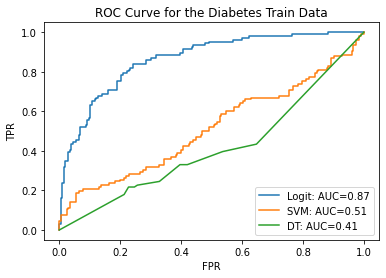

In [227]:
# graph the ROC curve and the AUC for the train data
fpr, tpr, thresholds = roc_curve(y_train, y_proba_train_logit)
auc_score = roc_auc_score(y_train, y_proba_train_logit)

plt.figure()
plt.plot(fpr, tpr, label=f"Logit: AUC={round(auc_score,2)}")

fpr, tpr, thresholds = roc_curve(y_train, y_proba_train_svc)
auc_score = roc_auc_score(y_train, y_proba_train_svc)

plt.plot(fpr, tpr, label=f"SVM: AUC={round(auc_score,2)}")

fpr, tpr, thresholds = roc_curve(y_train, y_proba_train_dt)
auc_score = roc_auc_score(y_train, y_proba_train_dt)

plt.plot(fpr, tpr, label=f"DT: AUC={round(auc_score,2)}")

plt.title("ROC Curve for the Diabetes Train Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [228]:
# Get probabilities for each observation for the three models
y_proba_test_logit = final_logit.predict_proba(X_test)[:,1]
y_proba_test_svc = svm_model.predict_proba(X_test)[:,1]
y_proba_test_dt = dt_model.predict_proba(X_test)[:,1]

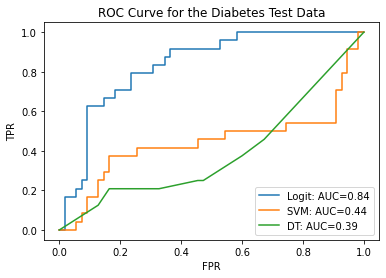

In [229]:
# graph the ROC curve and the AUC for the test data
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test_logit)
auc_score = roc_auc_score(y_test, y_proba_test_logit)

plt.figure()
plt.plot(fpr, tpr, label=f"Logit: AUC={round(auc_score,2)}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test_svc)
auc_score = roc_auc_score(y_test, y_proba_test_svc)

plt.plot(fpr, tpr, label=f"SVM: AUC={round(auc_score,2)}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test_dt)
auc_score = roc_auc_score(y_test, y_proba_test_dt)

plt.plot(fpr, tpr, label=f"DT: AUC={round(auc_score,2)}")

plt.title("ROC Curve for the Diabetes Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

The ROC (Receiver Operating Characteristic) Curve shows that the Logistic Regression model results in the highest ratio of True Positive Rate to False Positive Rate.  This means that for each threshold level (not depicted in this graph), there is a True Positive Rate that is higher for each level of the False Positive Rate.  This is better for our purposes, since we want to capture as many True positives as possible (observations with positive diabetes predicted as positive) while minimizing the False Positive Rate (negative diabetes predicted as positive).  The AUC (Area Under the Curve) is a way to measure the quality of the ROC curve.  We can see that the Logit model has the highest AUC at 0.85.  For the remaining sections, we will focus on the Logit Model for this analysis.

Next we will look at adjusting the score threshold to improve the recall.

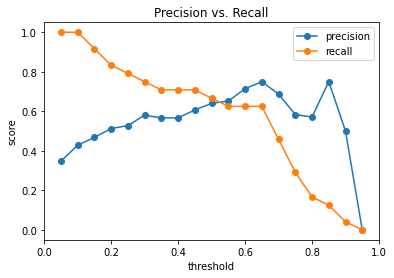

In [215]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 1, 0.05)

precisions = list()
recalls = list()

for threshold in thresholds:
    
    # Apply theshold
    y_threshold = np.where(y_proba_test_logit > threshold, 1, 0)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold, zero_division=0)
    recall = recall_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)
    
# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0,1)
plt.title('Precision vs. Recall')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

#### Precision vs. Recall
In the above graph, we have the precision and recall for a range of prediction probability thresholds for the test data.  As the threshold for the prediction probability increases, the precision increases, but the recall decreases.  For example, at a threshold of 0.5, any probability of 1 (positive for diabetes) greater than 0.5 is classified as positive, anything lower than 0.5 is predicted as negative.  At this threshold, the precision is solid, 0.83, but the recall is low, 0.5.  This means that of all the true positive cases, only half of them are correctly predicted as positive.

In the case of diabetes prediction, it is important to improve the recall as much as possible.  We would rather correctly identify as many true positives as possible, at the expense of turning up some false positives.  Looking at the graph, we may want to choose a threshold between 0.1 and 0.3.

In [216]:
# Iterate over the thresholds and compute the positive and negative recalls
recalls = list()
neg_recalls = list()

thresholds = np.linspace(0,1,50)
for threshold in thresholds:
    # Apply the cutoff and calculate the positive and negative recall
    y_pred = np.where(y_proba_test_logit > threshold, 1, 0)
    recall = recall_score(y_test, y_pred)
    neg_recall = recall_score(1-y_test, 1-y_pred)
    
    recalls.append(recall)
    neg_recalls.append(neg_recall)

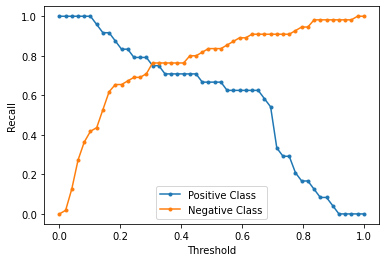

In [217]:
plt.figure()

plt.plot(thresholds, recalls, label='Positive Class', marker='.')
plt.plot(thresholds, neg_recalls, label='Negative Class', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.legend()
plt.show()

As the score threshold increases, the logit model becomes more precise as less of the negative class' recall improves - that is, more of the true negatives are being correctly classified.  The tradeoff is that as the score threshold increases, the positive class recall decreases - that is, less of the true positives are being correctly classified.

In [218]:
y_test_pred = np.where(y_proba_test_logit > 0.15, 1, 0)
y_test_pred.shape

(79,)

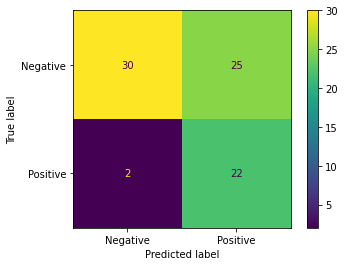

In [219]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Negative','Positive']).plot()

In [220]:
initial_report = classification_report(y_test, y_test_pred)
print(initial_report)

              precision    recall  f1-score   support

           0       0.94      0.55      0.69        55
           1       0.47      0.92      0.62        24

    accuracy                           0.66        79
   macro avg       0.70      0.73      0.65        79
weighted avg       0.79      0.66      0.67        79



When using a 0.15 score threshold, we have obtained a positive recall of 0.92.  This means that 92% of all positive diabetes cases were correctly classified using our model.  This is much better than the original logit model!  However, the downside is that the positive precision has gone down to 0.49.  This means that for all the positive predictions, only 49% are actually positive.  In the case of a diabetes prediction, as well as other medical situations, it is suggested to increase the positive recall at the expense of the positive precision.  The cost of missing a positive diabetes case could be huge - illness, lack of treatment, or death.  Whereas the cost of a false positive is less damaging - extra testing, extra precautions.  It is important to recognize the cost of a false negative and a false positive and compare the two.

#### Upsampling
We can improve our modeling by "upsampling" the minority class.  By evening out the classes, we can improve the recall of the model.  The recall is an important metric for this type of disease diagnosis problem.  We will upsample by increasing the observations of the positive class to match the number of observations in the negative class.

In [221]:
from sklearn.utils import resample

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Scale the data
scaler2 = StandardScaler()
# Fit scaler on train data
scaler2.fit(X_train)
# Transform train and test data using the fitted scaler
X_train = scaler2.transform(X_train)
X_test = scaler2.transform(X_test)

# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

Number of class 1 examples before: 106
Number of class 1 examples after: 207


In [223]:
# initialize, fit, and evaluate logit model
logit_model_bal = LogisticRegression(C=1, max_iter=1000, random_state=1)
logit_model_bal.fit(X_train_bal, y_train_bal)
y_proba_bal = logit_model_bal.predict_proba(X_test)[:,1]
y_proba_bal_thresh15 = np.where(y_proba_bal > 0.15, 1, 0)

report_upsampled = classification_report(y_test, y_proba_bal_thresh15)

# Print Results
print_line = "\n=======================================================================\n"
print("Upsampled Confusion Matrix:", print_line, confusion_matrix(y_test, y_proba_bal_thresh15))
print("\nUpsampled data classifcation report:", print_line, report_upsampled)

Upsampled Confusion Matrix: 
 [[22 33]
 [ 0 24]]

Upsampled data classifcation report: 
               precision    recall  f1-score   support

           0       1.00      0.40      0.57        55
           1       0.42      1.00      0.59        24

    accuracy                           0.58        79
   macro avg       0.71      0.70      0.58        79
weighted avg       0.82      0.58      0.58        79



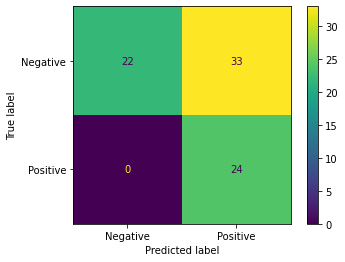

In [224]:
conf_matrix_bal = confusion_matrix(y_test, y_proba_bal_thresh15)
ConfusionMatrixDisplay(conf_matrix_bal, ['Negative','Positive']).plot()

After upsampling the positive class to match the number of observations in the negative class, we re-ran the Logit model and obtained a recall of 1.00!  As far as the test data is concerned, we have correctly classified every positive diabetes case.  While this is impressive, we must note that the precision has now decreased to 0.42.  The model without upsampling had been overestimating the negative scores as a way to maximize accuracy.  That worked because of the imbalanced classes.  We can be content with this latest model since it has maximized recall, which is the most crucial part of the diabetes predictive model.

#### Findings and conclusions:

##### Inference
Skin thickness, blood pressure, and insulin were not statistically significant in predicting the outcome of the patient.  From the remaining five predictor variables, increasing the glucose level had the highest relative impact towards predicting a positive diabetes case.  It was followed by BMI, then diabetes pedigree function, then age, then pregnancies.

This study is observational, meaning we are not able to deduce causation relationships.  We can only deduce associative relationships.  We can conclude that glucose has a high association with a positive diabetes outcome.  Since we cannot deduce any causal relationships, we are not able to say, with this data, that lowering glucose or lowering BMI will reduce the chances of being diagnosed with diabetes.  We can only say that there is an association with high glucose with diabetes or high BMI with diabetes.  What this analysis tells us is that if a person has high glucose, BMI, and/or diabetes pedigree function, it would be recommended that they undergo further testing as those are associated indicators of diabetes.


##### Predictive Models


Of the three models I tested (logistic regression, decision tree, and support vector machine), the logistic regression model performed the highest prediction accuracy at 0.785, followed by decision tree at 0.759, and then SVM at 0.747.  The logit model also had by far the best AUC score, at 0.84.

After determining that the logit model was most suitable for this data set, I adjusted the threshold to increase the recall.  By adjusting the score threshold to 0.15, the recall was increased to 0.92.  After upsampling the positive class to balance the two classes, I obtained a recall of 1.00 while the precision decreased to 0.42.

This final model can be useful for assisting as a diagnostic warning system to identify patients who are at high probability of having type 2 diabetes. Further analysis could include testing additional models for suitability and finding more data to conduct further analysis.